In [2]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# data splitting
from sklearn.model_selection import train_test_split

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder

# missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# binning
from sklearn.preprocessing import KBinsDiscretizer

# polynomial features
from sklearn.preprocessing import PolynomialFeatures

# column transfornmer
from sklearn.compose import ColumnTransformer

# pipeline
from sklearn.pipeline import Pipeline

# imbalanced
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE

# cross validation
from sklearn.model_selection import cross_val_score

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# modeling
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# modeling -> ensemble various type
from sklearn.ensemble import VotingClassifier, StackingClassifier

# ensemble similar type
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

# metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import confusion_matrix, recall_score, fbeta_score, make_scorer

import warnings
warnings.filterwarnings('ignore')

# 1. Business Overview n Data Understaning
---

## 📊 Pemahaman Bisnis (Business Understanding)

### 🏷️ Judul Proyek:
**Optimasi Kampanye Pemasaran Melalui Prediksi Kemungkinan Nasabah Melakukan Deposit**

### 🧠 Latar Belakang:
Dalam sektor perbankan, kampanye pemasaran sering dilakukan untuk menarik nasabah agar berinvestasi dalam produk seperti **deposito berjangka**. Namun, kampanye semacam ini melibatkan biaya tinggi—termasuk biaya tenaga kerja, telemarketing, dan sumber daya digital.

Dengan memanfaatkan data historis dan teknik analisis prediktif, bank dapat memperkirakan kemungkinan seorang nasabah akan melakukan deposit. Hal ini memungkinkan pemasaran yang lebih **efisien, tertarget, dan hemat biaya**, karena kampanye hanya difokuskan pada calon nasabah yang paling potensial.

### 🎯 Tujuan:
Memprediksi apakah seorang nasabah **akan membuka deposito berjangka** (`deposit = "yes"`) berdasarkan data demografis, riwayat interaksi, dan atribut lainnya. Hasil prediksi akan digunakan untuk menyusun strategi pemasaran yang lebih cerdas dan efisien.

---

## ❗ Identifikasi Permasalahan

Beberapa masalah utama yang ingin diselesaikan:

1. 🎯 **Efektivitas Kampanye Rendah:** Tanpa prediksi, kampanye menyasar seluruh basis data nasabah, sehingga konversi sangat rendah.
2. 💸 **Biaya Kampanye Tinggi:** Menghubungi seluruh nasabah (termasuk yang tidak tertarik) menambah beban biaya.
3. 🧍‍♂️ **Pengalaman Nasabah Buruk:** Nasabah yang sering dihubungi padahal tidak berminat dapat merasa terganggu dan kehilangan kepercayaan.
4. 🔍 **Kesulitan Mengidentifikasi Calon Potensial:** Sulit bagi tim pemasaran menentukan siapa yang paling mungkin merespons positif.

---

## 🧮 Definisi False Positive (FP) dan False Negative (FN)

Target variabel: `deposit`

- ✅ **Kelas Positif (1):** Nasabah **akan membuka deposito** (`deposit = "yes"`)
- ❌ **Kelas Negatif (0):** Nasabah **tidak akan membuka deposito** (`deposit = "no"`)

| 🧾 **Hasil Aktual vs Prediksi** | 🔮 Prediksi: Deposit | 🔮 Prediksi: Tidak Deposit |
|-------------------------------|----------------------|----------------------------|
| ✅ **Aktual: Deposit**         | 🎯 True Positive (TP) | ❌ False Negative (FN)     |
| ❌ **Aktual: Tidak Deposit**   | ⚠️ False Positive (FP) | ✔️ True Negative (TN)      |

### ⚠️ False Positive (FP):
- **Prediksi:** Nasabah akan membuka deposit  
- **Aktual:** Nasabah tidak membuka deposit  
- **Dampak:** Bank membuang biaya dan tenaga untuk menghubungi nasabah yang tidak tertarik  
- 💸 Estimasi kerugian: ± **$100 per nasabah** (biaya waktu staf, sistem, dan opportunity cost)

### ❌ False Negative (FN):
- **Prediksi:** Nasabah tidak akan membuka deposit  
- **Aktual:** Nasabah sebenarnya akan membuka deposit  
- **Dampak:** Bank kehilangan peluang mendapatkan nasabah yang potensial  
- 💸 Estimasi kerugian: ± **$500 per nasabah** (rata-rata nilai deposito dan margin keuntungan)

---

## 🎯 Tujuan Optimasi

- 🔻 **Minimalkan False Negative:** Agar bank tidak kehilangan potensi nasabah berharga.
- ⚖️ **Kendalikan False Positive:** Agar tidak boros biaya menghubungi nasabah yang tidak berminat.
- 💼 **Efisiensi Kampanye:** Memaksimalkan hasil kampanye dengan mengalokasikan sumber daya ke segmen yang paling potensial.
- 📈 **ROI Lebih Baik:** Fokus pada prediksi yang akurat akan meningkatkan return on investment dari seluruh kampanye pemasaran.

> 💡 **Kesimpulan:** Dalam konteks pemasaran, model prediksi harus **seimbang antara sensitivitas dan efisiensi biaya**, dengan penekanan lebih besar untuk **menghindari FN** (kehilangan peluang) dibandingkan **FP** (pemborosan kampanye).

Oleh karena itu, model akan dioptimalkan menggunakan **F2-score**, yang memberikan bobot lebih besar pada recall dibanding precision, agar lebih sensitif dalam menangkap nasabah yang benar-benar akan melakukan deposit.



# 2. Data Understanding dan Cleansing
---

## 🧾 Definisi Setiap Kolom dalam Dataset Bank Marketing

| No | Kolom     | Tipe Data | Deskripsi                                                                 |
|----|-----------|-----------|---------------------------------------------------------------------------|
| 0  | age       | int64     | Umur nasabah                                                              |
| 1  | job       | object    | Jenis pekerjaan nasabah (admin., technician, services, dll.)              |
| 2  | marital   | object    | Status pernikahan nasabah (married, single, divorced)                     |
| 3  | education | object    | Tingkat pendidikan nasabah (primary, secondary, tertiary, unknown)        |
| 4  | default   | object    | Apakah nasabah pernah gagal bayar sebelumnya (yes/no)                     |
| 5  | balance   | int64     | Saldo rata-rata tahunan dalam akun nasabah (dalam Euro)                   |
| 6  | housing   | object    | Apakah nasabah memiliki pinjaman rumah (yes/no)                           |
| 7  | loan      | object    | Apakah nasabah memiliki pinjaman pribadi (yes/no)                         |
| 8  | contact   | object    | Jenis kontak komunikasi terakhir (cellular, telephone)                    |
| 9  | day       | int64     | Hari dalam bulan saat nasabah terakhir dihubungi                         |
| 10 | month     | object    | Bulan saat nasabah terakhir dihubungi                                     |
| 11 | duration  | int64     | Durasi panggilan terakhir (dalam detik)                                   |
| 12 | campaign  | int64     | Jumlah kontak yang dilakukan selama kampanye saat ini                     |
| 13 | pdays     | int64     | Hari sejak nasabah terakhir dihubungi dalam kampanye sebelumnya (-1 = tidak pernah) |
| 14 | previous  | int64     | Jumlah kontak sebelum kampanye ini                                        |
| 15 | poutcome  | object    | Hasil dari kampanye pemasaran sebelumnya (success, failure, unknown)      |
| 16 | deposit   | object    | Apakah nasabah berlangganan deposito berjangka (yes/no)                   |


In [4]:
df = pd.read_csv('bank.csv')

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [7]:
df.duplicated().sum()

0

> Aman tidak ada data duplicate dan missing value

In [8]:
display(df['default'].value_counts(normalize=True))

default
no     0.984949
yes    0.015051
Name: proportion, dtype: float64

Insight

> Proporsi customer yang berstatus `default` dengan customer yang `no default` sangat jauh sekali perbandingannya yaitu sekitar 1:98 sehingga data bersifat imbalance dan data perlu dilakukan balancing

# 3. EDA
---

- Menganalisis distribusi data numerik
- Menganalisis korelasi antar data
- Menganalisis frekuensi data kategorik

=== Ringkasan Statistik ===
                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%     

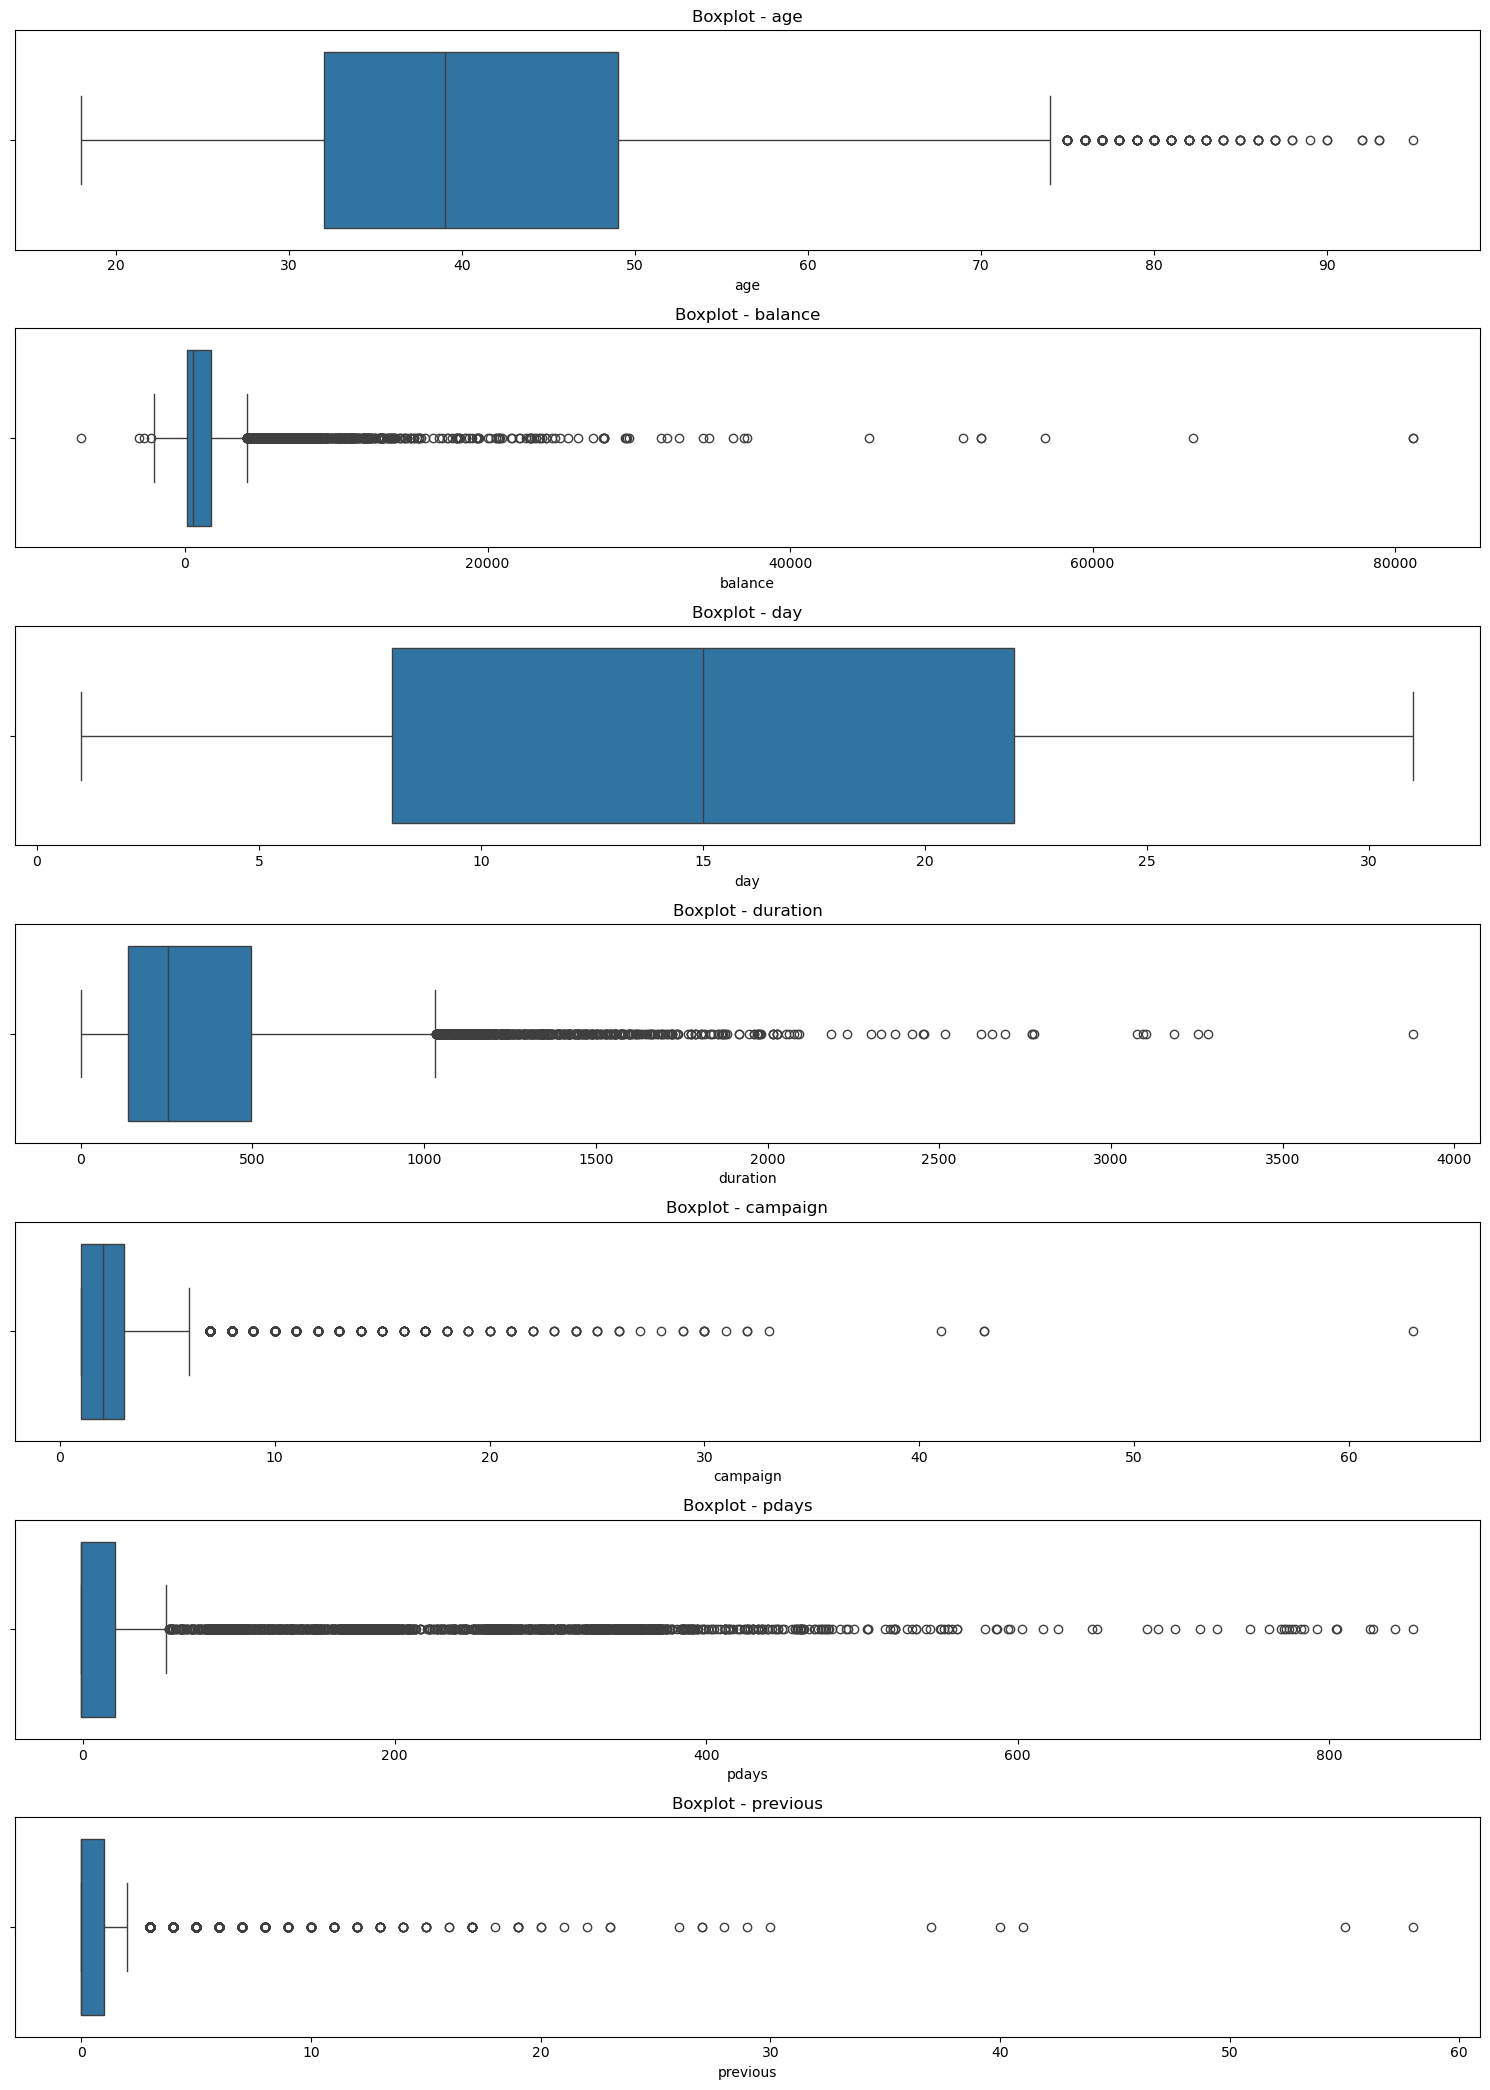

In [9]:
# Identifikasi kolom numerikal
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Descriptive statistics
print("=== Ringkasan Statistik ===")
print(df[numerical_columns].describe())
print("\n")

# Boxplots untuk semua kolom numerik
plt.figure(figsize=(15, len(numerical_columns) * 3))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()

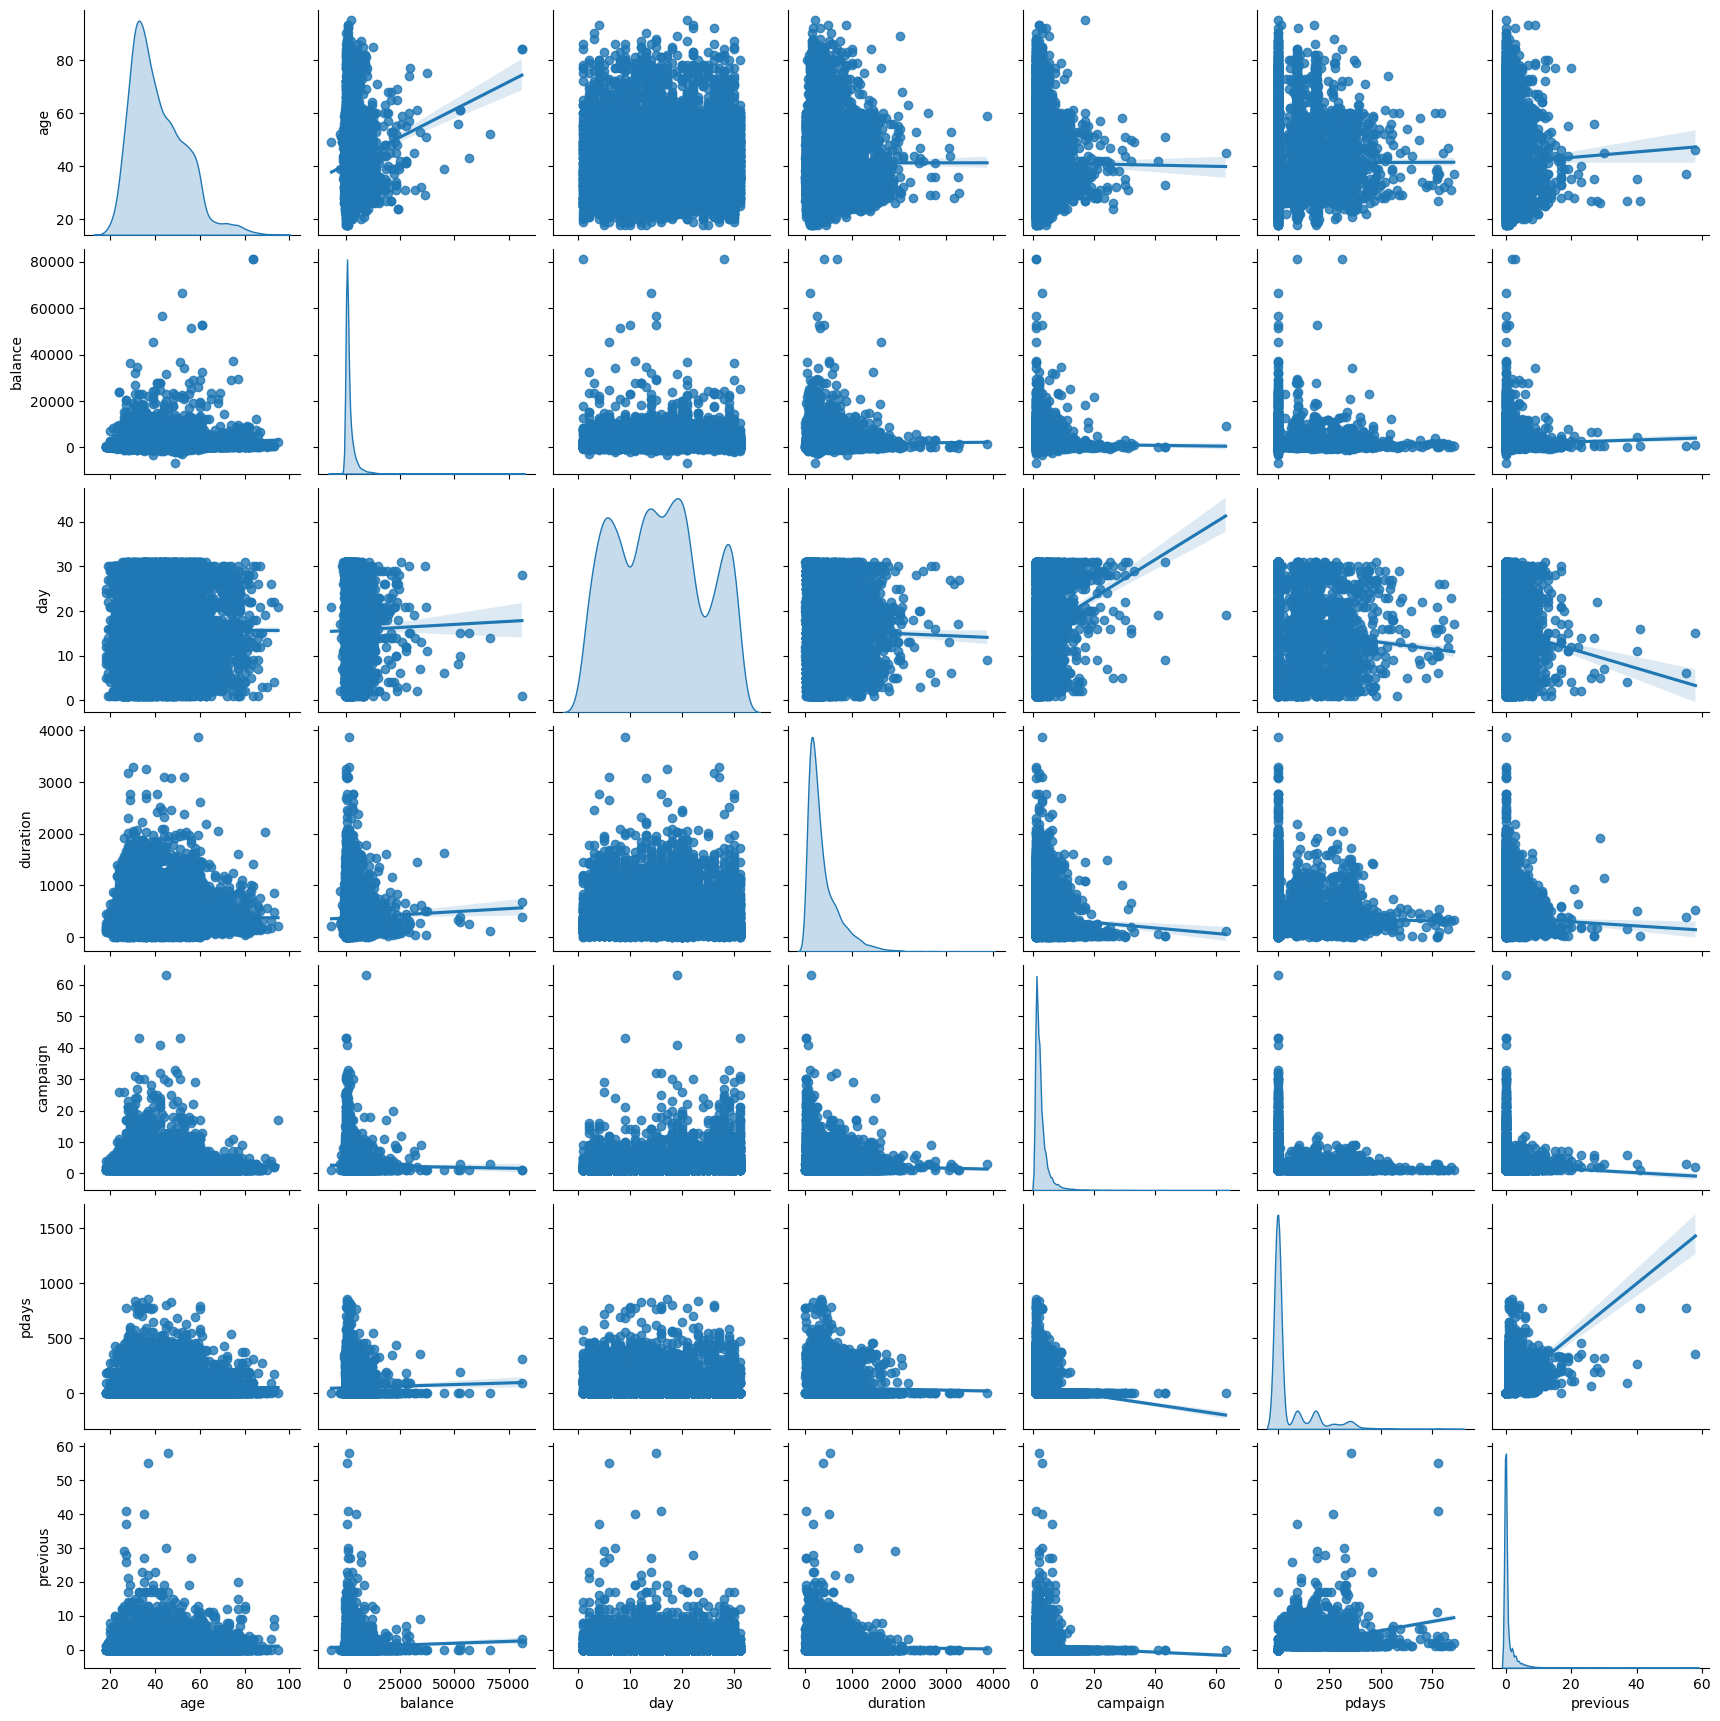

In [10]:
sns.pairplot(df, diag_kind='kde', kind = 'reg')

<Axes: >

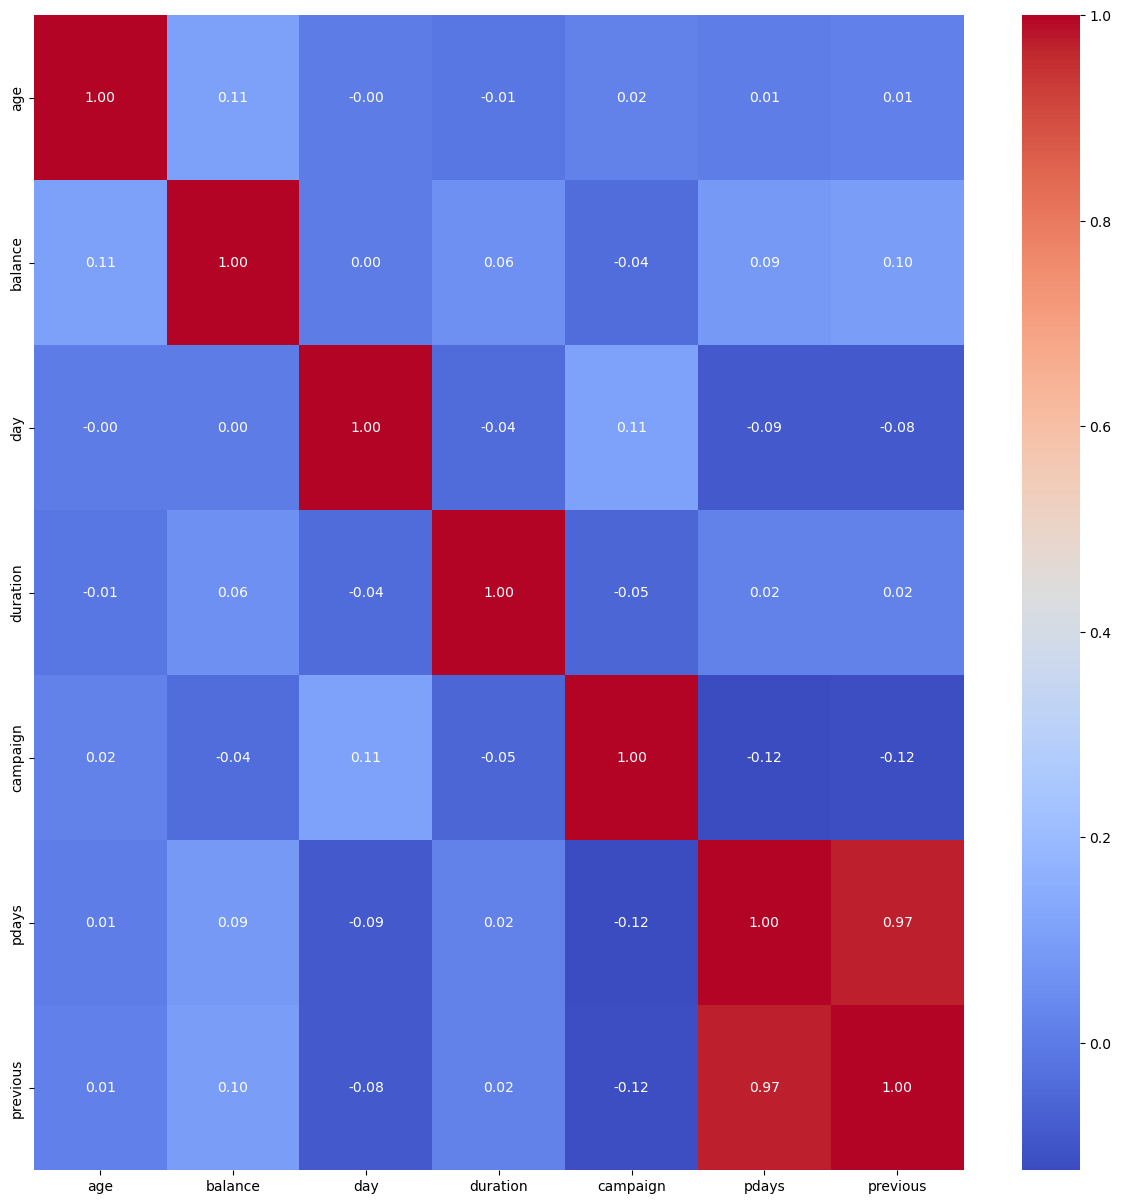

In [11]:
# bigger figsize
plt.figure(figsize=(15, 15))
# Select only numeric columns 
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix and plot the heatmap
sns.heatmap(numeric_df.corr(method='spearman'), annot=True, cmap='coolwarm', fmt='.2f')

In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

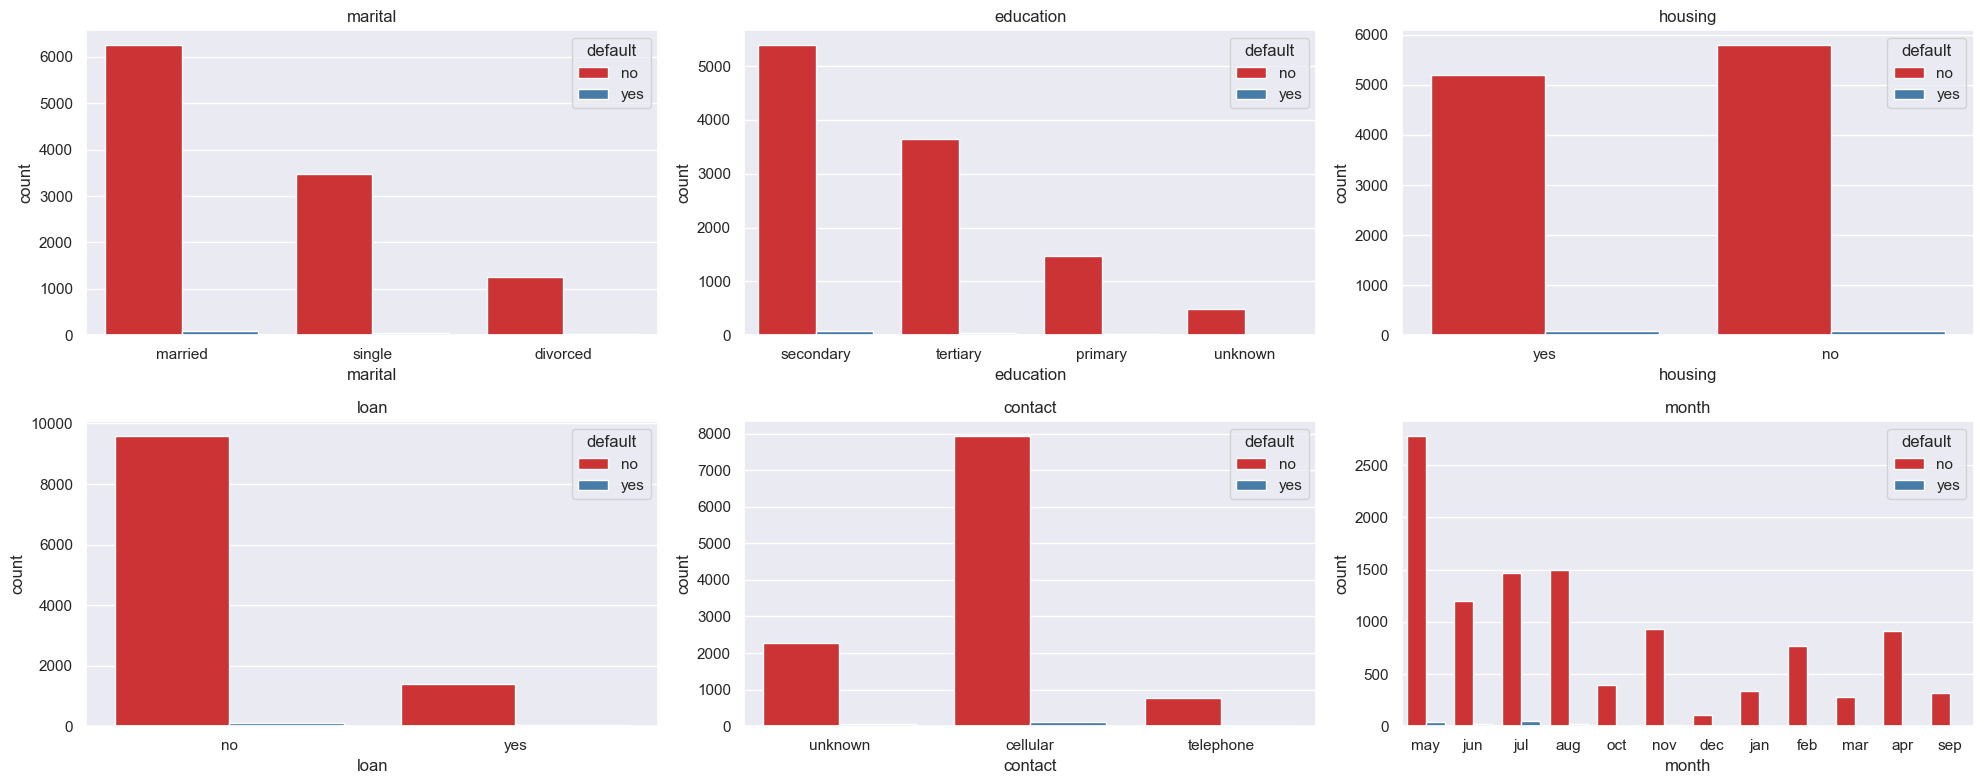

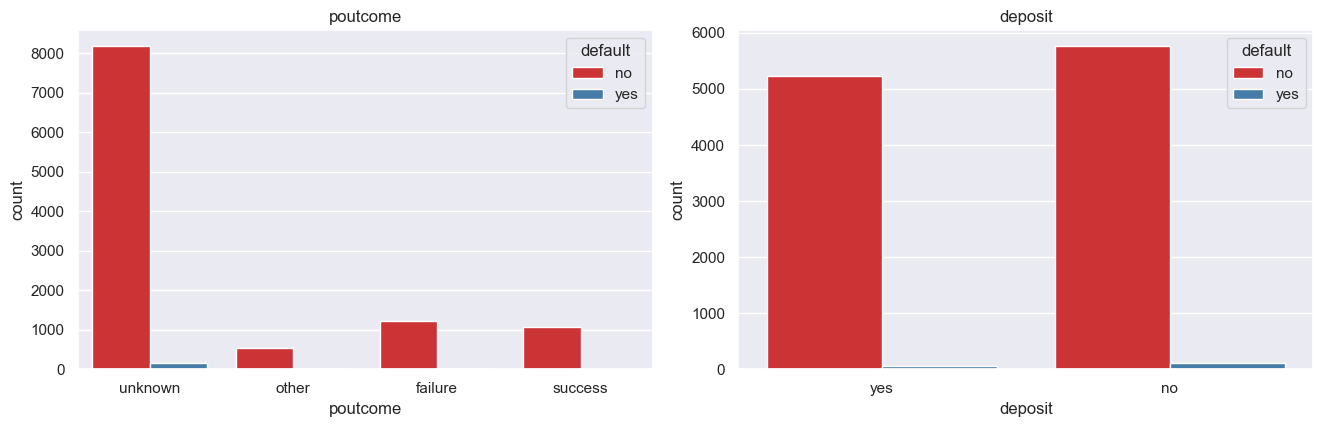

In [13]:
# Jumlah nasabah untuk tiap categorical variables, dibagi berdasarkan asal negaranya
features = [ 'marital', 'education', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'deposit']
sns.set(palette='Set1')

# Define the number of rows and columns for subplots
rows, cols = 2, 3
total_plots = rows * cols

# Loop through features and create subplots
for i in range(0, len(features), total_plots):
    plt.figure(figsize=(20, 8))
    plotnumber = 1
    for feature in features[i:i + total_plots]:
        ax = plt.subplot(rows, cols, plotnumber)
        sns.countplot(x=feature, hue='default', data=df)
        plt.xlabel(feature)
        plt.title(feature)
        plotnumber += 1
    plt.tight_layout()
    plt.show()

# **4. Define X and y**
---

In [14]:
X = df.drop(['deposit'], axis=1)
y = df['deposit']

In [15]:
#1. Label encoding untuk kolom Yes/No → 0/1
yes_no_columns = [
    'housing','loan','default'
]
for col in yes_no_columns:
    X[col] = X[col].map({'yes': 1, 'no': 0})

# 2. Label encoding untuk kolom categorical
y = y.map({'yes': 1, 'no': 0})

# 2. Tricky columns dengan 3 value (Yes, No, No internet/phone service)
tricky_columns = ['month']

for col in tricky_columns:
    X[col] = X[col].replace({'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'jan':1, 'feb':2,
       'mar':3, 'apr':4, 'sep':9})
    
X['education'] = X['education'].map({'unknown': 0,'primary': 1, 'secondary':2,'tertiary':3})

In [16]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,admin.,married,2,0,2343,1,0,unknown,5,5,1042,1,-1,0,unknown
1,56,admin.,married,2,0,45,0,0,unknown,5,5,1467,1,-1,0,unknown
2,41,technician,married,2,0,1270,1,0,unknown,5,5,1389,1,-1,0,unknown
3,55,services,married,2,0,2476,1,0,unknown,5,5,579,1,-1,0,unknown
4,54,admin.,married,3,0,184,0,0,unknown,5,5,673,2,-1,0,unknown


In [17]:
# ColumnTransformer
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['job', 'marital', 'contact', 'poutcome']),
    ('scaling', RobustScaler(), ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'])
], remainder='passthrough')

In [18]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    stratify=y,
    test_size=0.2,
    random_state=42)

# **5. Data preprocessing**
---

In [19]:
X.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,admin.,married,2,0,2343,1,0,unknown,5,5,1042,1,-1,0,unknown


In [20]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes


# **6. Model Benchmark**
---

## **Define Model dan Metode Resampling**

In [21]:
# resampling
smote = SMOTE(sampling_strategy = 'minority',random_state=0)
nearmiss = NearMiss()
rus = RandomUnderSampler(random_state=0)
ros = RandomOverSampler(random_state=0)

In [26]:
# define model
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=42)

# ensemble various
voting = VotingClassifier(estimators=[('clf1', logreg),
                                      ('clf2', knn),
                                      ('clf3', tree)])   # base learner

stacking = StackingClassifier(estimators=[('logreg', logreg),
                                      ('knn', knn),
                                      ('tree', tree)],
                                      final_estimator=LogisticRegression(random_state=42),)

# ensemble similar
bagging = BaggingClassifier(random_state=42, estimator=KNeighborsClassifier(), n_estimators=100)
rf = RandomForestClassifier(random_state=42) # bagging
adaboost = AdaBoostClassifier(random_state=42) # boosting

gboost = GradientBoostingClassifier(random_state = 42) 
xgboost = XGBClassifier(random_state = 42)

## **6.1 Tanpa Menggunakan Resampling**

In [27]:
# Define imbalanced treatment method
models = [logreg, knn, tree, voting, stacking, rf, adaboost, gboost, xgboost]
score = []
nilai_mean_1 = []
nilai_std_1 = []

# F2 score (Karena cost dari FN (diprediksi tidak churn, padahal aslinya churn) lebih tinggi dari pada FP (diprediksi churn, padahal aslinya tidak churn))
f2_score = make_scorer(fbeta_score, beta=2)

for i in models:

    pipe_model_1 = Pipeline([
        ('transformer', transformer),
        ('model', i)
    ])

    model_cv_1 = cross_val_score(
        estimator = pipe_model_1, 
        X= X_train, 
        y= y_train, 
        cv=5, 
        scoring= f2_score, 
        error_score='raise'
        )

    # print(model_cv, i)

    score.append(model_cv_1)
    nilai_mean_1.append(model_cv_1.mean())
    nilai_std_1.append(model_cv_1.std())

In [30]:
df_cv_1 = pd.DataFrame({
    'model':['logreg', 'knn', 'tree','voting','stacking', 'rf',' ada', 'gbc', 'xgbc'],
    'mean':nilai_mean_1,
    'std':nilai_std_1
})

df_cv_1

,model,mean,std
0,logreg,0.771391,0.006821
1,knn,0.778949,0.016072
2,tree,0.763878,0.017795
3,voting,0.814581,0.014209
4,stacking,0.826217,0.015887
5,rf,0.857112,0.005160
6,ada,0.797887,0.008577
7,gbc,0.847033,0.008847
8,xgbc,0.862137,0.011752


## **6.2 Menggunakan Metode `RandomOverSampler`**

In [31]:
# Define imbalanced treatment method
models = [logreg, knn, tree, voting, stacking, rf, adaboost, gboost, xgboost]
score = []
nilai_mean_2 = []
nilai_std_2 = []

# F2 score (Karena cost dari FN (diprediksi tidak churn, padahal aslinya churn) lebih tinggi dari pada FP (diprediksi churn, padahal aslinya tidak churn))
f2_score = make_scorer(fbeta_score, beta=2)

for i in models:

    pipe_model_2 = Pipeline([
        ('transformer', transformer),
        ('resampler', ros),
        ('model', i)
    ])

    model_cv_2 = cross_val_score(
        estimator = pipe_model_2, 
        X= X_train, 
        y= y_train, 
        cv=5, 
        scoring= f2_score, 
        error_score='raise'
        )

    # print(model_cv, i)

    score.append(model_cv_2)
    nilai_mean_2.append(model_cv_2.mean())
    nilai_std_2.append(model_cv_2.std())

In [32]:
df_cv_2 = pd.DataFrame({
    'model':['logreg', 'knn', 'tree','voting','stacking', 'rf',' ada', 'gbc', 'xgbc'],
    'mean':nilai_mean_2,
    'std':nilai_std_2
})

df_cv_2

,model,mean,std
0,logreg,0.790490,0.007399
1,knn,0.789889,0.016212
2,tree,0.767374,0.007135
3,voting,0.820459,0.012564
4,stacking,0.831749,0.010797
5,rf,0.857694,0.002329
6,ada,0.809577,0.009481
7,gbc,0.857990,0.009733
8,xgbc,0.865158,0.007627


## **6.3 Menggunakan `SMOTE`**

In [33]:
# Define imbalanced treatment method
models = [logreg, knn, tree, voting, stacking, rf, adaboost, gboost, xgboost]
score = []
nilai_mean_3 = []
nilai_std_3 = []

# F2 score (Karena cost dari FN (diprediksi tidak churn, padahal aslinya churn) lebih tinggi dari pada FP (diprediksi churn, padahal aslinya tidak churn))
f2_score = make_scorer(fbeta_score, beta=2)

for i in models:

    pipe_model_3 = Pipeline([
        ('transformer', transformer),
        ('resampler', smote),
        ('model', i)
    ])

    model_cv_3 = cross_val_score(
        estimator = pipe_model_3, 
        X= X_train, 
        y= y_train, 
        cv=5, 
        scoring= f2_score, 
        error_score='raise'
        )

    # print(model_cv, i)

    score.append(model_cv_3)
    nilai_mean_3.append(model_cv_3.mean())
    nilai_std_3.append(model_cv_3.std())

In [34]:
df_cv_3 = pd.DataFrame({
    'model':['logreg', 'knn', 'tree','voting','stacking', 'rf',' ada', 'gbc', 'xgbc'],
    'mean':nilai_mean_3,
    'std':nilai_std_3
})

df_cv_3

,model,mean,std
0,logreg,0.789385,0.006960
1,knn,0.793626,0.015986
2,tree,0.773197,0.015801
3,voting,0.824165,0.010767
4,stacking,0.832328,0.012235
5,rf,0.858202,0.004860
6,ada,0.812029,0.009149
7,gbc,0.854542,0.008718
8,xgbc,0.864721,0.005086


## **6.4 Menggunakan `RandomUnderSampler`**

In [35]:
# Define imbalanced treatment method
models = [logreg, knn, tree, voting, stacking, rf, adaboost, gboost, xgboost]
score = []
nilai_mean_4 = []
nilai_std_4 = []

# F2 score (Karena cost dari FN (diprediksi tidak churn, padahal aslinya churn) lebih tinggi dari pada FP (diprediksi churn, padahal aslinya tidak churn))
f2_score = make_scorer(fbeta_score, beta=2)

for i in models:

    pipe_model_4 = Pipeline([
        ('transformer', transformer),
        ('resampler', rus),
        ('model', i)
    ])

    model_cv_4 = cross_val_score(
        estimator = pipe_model_4, 
        X= X_train, 
        y= y_train, 
        cv=5, 
        scoring= f2_score, 
        error_score='raise'
        )

    # print(model_cv, i)

    score.append(model_cv_4)
    nilai_mean_4.append(model_cv_4.mean())
    nilai_std_4.append(model_cv_4.std())

In [36]:
df_cv_4 = pd.DataFrame({
    'model':['logreg', 'knn', 'tree','voting','stacking', 'rf',' ada', 'gbc', 'xgbc'],
    'mean':nilai_mean_4,
    'std':nilai_std_4
})

df_cv_4

,model,mean,std
0,logreg,0.788549,0.006223
1,knn,0.794031,0.017567
2,tree,0.770106,0.010821
3,voting,0.825189,0.013658
4,stacking,0.835405,0.010854
5,rf,0.863409,0.005809
6,ada,0.810565,0.006449
7,gbc,0.857664,0.008995
8,xgbc,0.868234,0.005333


## **6.5 Menggunakan `NearMiss`**

In [39]:
# Define imbalanced treatment method
models = [logreg, knn, tree, voting, stacking, rf, adaboost, gboost, xgboost]
score = []
nilai_mean_5 = []
nilai_std_5 = []

# F2 score (Karena cost dari FN (diprediksi tidak churn, padahal aslinya churn) lebih tinggi dari pada FP (diprediksi churn, padahal aslinya tidak churn))
f2_score = make_scorer(fbeta_score, beta=2)

for i in models:

    pipe_model_5 = Pipeline([
        ('transformer', transformer),
        ('resampler', nearmiss),
        ('model', i)
    ])

    model_cv_5 = cross_val_score(
        estimator = pipe_model_5, 
        X= X_train, 
        y= y_train, 
        cv=5, 
        scoring= f2_score, 
        error_score='raise'
        )

    # print(model_cv, i)

    score.append(model_cv_5)
    nilai_mean_5.append(model_cv_5.mean())
    nilai_std_5.append(model_cv_5.std())

In [40]:
df_cv_5 = pd.DataFrame({
    'model':['logreg', 'knn', 'tree','voting','stacking', 'rf',' ada', 'gbc', 'xgbc'],
    'mean':nilai_mean_5,
    'std':nilai_std_5
})

df_cv_5

,model,mean,std
0,logreg,0.787662,0.007630
1,knn,0.789639,0.013787
2,tree,0.782657,0.011963
3,voting,0.825505,0.013512
4,stacking,0.817943,0.016609
5,rf,0.862332,0.007414
6,ada,0.815840,0.004775
7,gbc,0.850474,0.007725
8,xgbc,0.868676,0.005748


## **Model dan Metode Resampling Terbaik**

> Berdasarkan Benchmarking berbagai model menggunakan berbagai metode resampling, maka didapatkan Model dan Metode Resampling yang menghasilkan `F2-Score` terbaik adalah: **XGBoost** dengan Metode Resampling terbaik: `RandomUnderSampler`. `F2-Score` terbaik adalah **0.8687**

# **7. Hyperparameter Tuning**
---

Melalui tahap Hyperparameter Tuning, kita dapat mencari kombinasi parameter dari Model `XGBoost` dengan Metode Resampling `NearMiss` yang menghasilkan `F2-Score` terbaik dari proses benchmarking

In [83]:
# Tuning parameter XGBooost
max_depth = list(np.arange(1,11))                       # kedalaman pohon
learning_rate = list(np.arange(0.01, 1.0, 0.01))        # learning rate
n_estimators = list(np.arange(100,201))                 # jumlah pohon
subsample = list(np.arange(0.2, 1.0, 0.1))              # jumlah baris tiap pohon (% dari total baris train set)
gamma = list(np.arange(1,11))                           # gamma (min_impurity_decrease)
colsample_bytree = list(np.arange(0.1, 1.0, 0.2))       # jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
reg_alpha = list(np.logspace(-3,3,7))                   # alpha (regularization)

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'balancing':[smote, rus, ros, nearmiss, None],
    'model__max_depth':max_depth, 
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__subsample':subsample,
    'model__gamma':gamma,
    'model__colsample_bytree':colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [84]:
# Benchmark model XGBoost
xgb = XGBClassifier(random_state=0, verbosity=0)

# Create the algorithm chains
estimator_xgbc = Pipeline([
        ('transformer', transformer),
        ('balancing', smote), 
        ('model', xgb)
        ])

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgbc, 
    param_distributions = hyperparam_space_xgb, 
    cv = 5, 
    scoring = f2_score, 
    n_jobs = -1,  
    random_state=0,
    n_iter=1000 
)

In [85]:
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['job',
                                                                                'marital',
                                                                                'contact',
                                                                                'poutcome']),
                                                                              ('scaling',
                                                                               RobustScaler(),
                                                                               ['age',
                                                                                'balance',
                                                                                'day',
                                                                                'duration',
                                                                                'campaign',
                                                                                'pdays',
                                                                                'previous'])])),
                                             ('balancing',
                                              SMOTE(random_state=0,
                                                    sampling_strategy='min...
                                                                118, 119, 120,
                                                                121, 122, 123,
                                                                124, 125, 126,
                                                                127, 128, 129, ...],
                                        'model__reg_alpha': [0.001, 0.01, 0.1,
                                                             1.0, 10.0, 100.0,
                                                             1000.0],
                                        'model__subsample': [0.2,
                                                             0.30000000000000004,
                                                             0.4000000000000001,
                                                             0.5000000000000001,
                                                             0.6000000000000001,
                                                             0.7000000000000002,
                                                             0.8000000000000003,
                                                             0.9000000000000002]},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [86]:
print(random_xgb.best_score_)

0.8789851457831738


In [87]:
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: 0.8789851457831738
Best_params: {'model__subsample': 0.9000000000000002, 'model__reg_alpha': 1.0, 'model__n_estimators': 181, 'model__max_depth': 10, 'model__learning_rate': 0.02, 'model__gamma': 4, 'model__colsample_bytree': 0.9000000000000001, 'balancing': RandomOverSampler(random_state=0)}


# **8. Performance in Test Set**
---

### Before Hyperparameter Tuning

In [88]:
model = XGBClassifier(random_state=42, verbosity=0) 

model_pipe = Pipeline([
    ('transformer', transformer),
    ('balancing', rus),
    ('model', model)
])

# fitting
model_pipe.fit(X_train, y_train)

# predict
y_pred = model_pipe.predict(X_test)

# recall score
f2score_xgbc_benchmark = fbeta_score(y_test, y_pred, beta=2)
f2score_xgbc_benchmark

0.8700522778192681

### After Hyperparameter Tuning

In [89]:
# best model
xgbc_tuning = random_xgb.best_estimator_

# fitting
xgbc_tuning.fit(X_train, y_train)

# predict
y_pred_xgbc_tuning = xgbc_tuning.predict(X_test)

# recall score
f2score_xgbc_tuning = fbeta_score(y_test, y_pred_xgbc_tuning, beta=2)
f2score_xgbc_tuning

0.8876945885841364

# **9. Hasil Akhir Model**
---

Classification Report

In [90]:
print('XGBoost Before Tuning')
print(classification_report(y_test, y_pred))

XGBoost Before Tuning
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1175
           1       0.83      0.88      0.85      1058

    accuracy                           0.86      2233
   macro avg       0.86      0.86      0.86      2233
weighted avg       0.86      0.86      0.86      2233



In [91]:
print('XGBoost After Tuning')
print(classification_report(y_test, y_pred_xgbc_tuning))

XGBoost After Tuning
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1175
           1       0.82      0.91      0.86      1058

    accuracy                           0.86      2233
   macro avg       0.86      0.87      0.86      2233
weighted avg       0.87      0.86      0.86      2233



Confusion Matrix

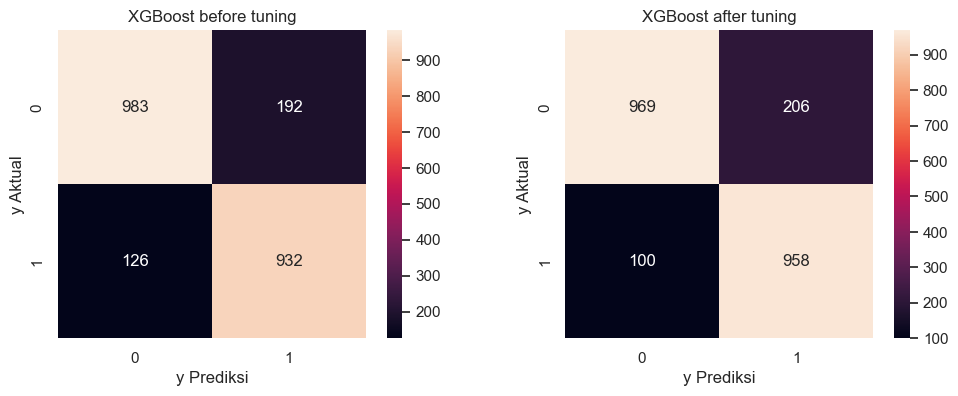

In [92]:
plt.figure(figsize=(12,4))

# Model XGBoost before tuning
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('XGBoost before tuning')

# Model XGBoost after tuning
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_xgbc_tuning), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('XGBoost after tuning');

Insight

> Hasil Hyperparameter Tuning XGboost menghasilkan model yang lebih peka terhadap nilai `1` sehingga berhasil mengurangi prediksi `False Negatif`

In [93]:
y_test.value_counts()

deposit
0    1175
1    1058
Name: count, dtype: int64

### 🧠 Definisi FP dan FN
- FP (False Positive): Kita prediksi nasabah akan membuka deposito → bank memberikan promosi (biaya: $100), padahal nasabah tidak berminat.
- FN (False Negative): Kita prediksi nasabah tidak akan membuka deposito → bank tidak memberikan promosi, padahal nasabah sebenarnya berminat → kehilangan potensi nasabah (opportunity cost: $500)

### 🚫 Tanpa menggunakan ML
Sebelum menggunakan ML, bank tidak mengetahui siapa saja nasabah yang akan membuka deposito. Untuk menghindari kehilangan peluang, bank memberikan promosi kepada semua nasabah.

Kita asumsikan bahwa ketika seorang nasabah diberikan promosi, maka ia tidak akan membuka deposito jika memang tidak berminat.

|            | Predicted (0) | Predicted (1) |
| :--------: | :-----------: | :-----------: |
| Actual (0) |       0       |      1175     |
| Actual (1) |       0       |      1058     |

- Total nasabah yang dipromosikan: 1175 + 1058 = 2233
- Pengeluaran bank untuk promosi: 2233 × $100 = $223,300
- Promosi tepat sasaran kepada nasabah yang benar-benar membuka deposito: **1058 × $100 = $105,800**
- Kerugian karena promosi sia-sia ke nasabah yang tidak berminat: **$223,300 - $105,800 = $117,500**

### 🤖 Dengan menggunakan ML
Setelah menggunakan machine learning, bank dapat memprediksi siapa saja nasabah yang kemungkinan besar akan membuka deposito, dan hanya memberikan promosi kepada mereka.

|            | Predicted (0) | Predicted (1) |
| :--------: | :-----------: | :-----------: |
| Actual (0) |      969     |      206      |
| Actual (1) |      100      |      958      |

- Pengeluaran promosi ke nasabah yang tidak berminat (FP): 206 × $100 = $20,600
- Kehilangan potensi dari nasabah yang sebenarnya berminat tapi tidak diprediksi (FN): 100 × $500 = $50,000
- Total kerugian: $20,600 + $50,000 = $70,600

### ✅ Kerugian menurun setelah menggunakan ML
- Kerugian sebelum menggunakan ML: $117,500
- Kerugian setelah menggunakan ML: $70,600
- ML berhasil menurunkan kerugian sebesar:
**39.9% → ($117,500 - $76,500) / $117,500**

In [95]:
(117500-70600)/117500

0.39914893617021274

# **10. Interpretasi Model**
---

In [96]:
xgbc_tuning

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'marital', 'contact',
                                                   'poutcome']),
                                                 ('scaling', RobustScaler(),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous'])])),
                ('balancing', RandomOverSampler(random_state=0)),
                ('model',
                 XGBClassifier(base_score=None, boo...
                               feature_types=None, feature_weights=None,
                               gamma=4, grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.02,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=181, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [97]:
# Feature Importance
importances = xgbc_tuning.named_steps['model'].feature_importances_

# Extract feature names after transformation
transformed_columns = xgbc_tuning.named_steps['transformer'].get_feature_names_out()

# Create a DataFrame for feature importance
important_features = pd.DataFrame({'feature': transformed_columns, 'importance': importances})
important_features.sort_values(by='importance', ascending=False, inplace=True)
display(important_features)

,feature,importance
21,scaling__duration,0.174003
16,onehot__poutcome_success,0.155735
14,onehot__contact_unknown,0.131381
27,remainder__housing,0.055712
17,onehot__poutcome_unknown,0.044097
29,remainder__month,0.034178
23,scaling__pdays,0.032963
0,onehot__job_blue-collar,0.028552
20,scaling__day,0.025814
19,scaling__balance,0.025754


Insight

3 Feature yang paling signifikan mempengaruhi berdasarkan `feature_importance` adalah:
- `contact_unknown`
- `poutcome_success`
- `duration`


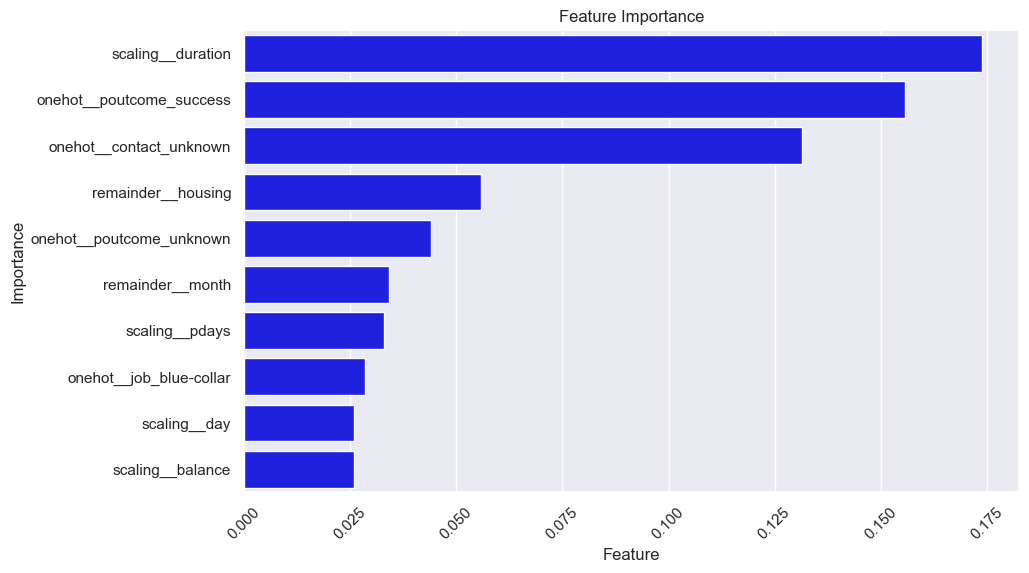

In [98]:
# tampilkan 10 feature terpenting
important_features = important_features.head(10)
plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.xticks(rotation=45)
# Plot the feature importance
plt.xlabel('Feature')
plt.ylabel('Importance')
# Create a bar plot
sns.barplot(data=important_features, y='feature', x='importance', color='blue');

# **11. Save Model Final**
---

In [99]:
import joblib
# simpan
joblib.dump(xgbc_tuning, 'xgbc_tuning.joblib')

# load
model_loaded = joblib.load('xgbc_tuning.joblib')
model_loaded


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'marital', 'contact',
                                                   'poutcome']),
                                                 ('scaling', RobustScaler(),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous'])])),
                ('balancing', RandomOverSampler(random_state=0)),
                ('model',
                 XGBClassifier(base_score=None, boo...
                               feature_types=None, feature_weights=None,
                               gamma=4, grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.02,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=181, n_jobs=None,
                               num_parallel_tree=None, ...))])

# **12. SHAP**
---

In [100]:
import shap

In [101]:
# ambil model dan data dari pipeline
my_model = xgbc_tuning[-1]
my_data = xgbc_tuning[0].transform(X_train)

# define explainer
explainer_shap = shap.TreeExplainer(
    model= my_model,
    data= my_data,
    # feature_dependence= 'independent',
    # model_output= 'probability'
)

# hitung shap value untuk tiap baris di data train
shap_values = explainer_shap.shap_values(my_data)

 98%|===================| 8764/8929 [00:46<00:00]        

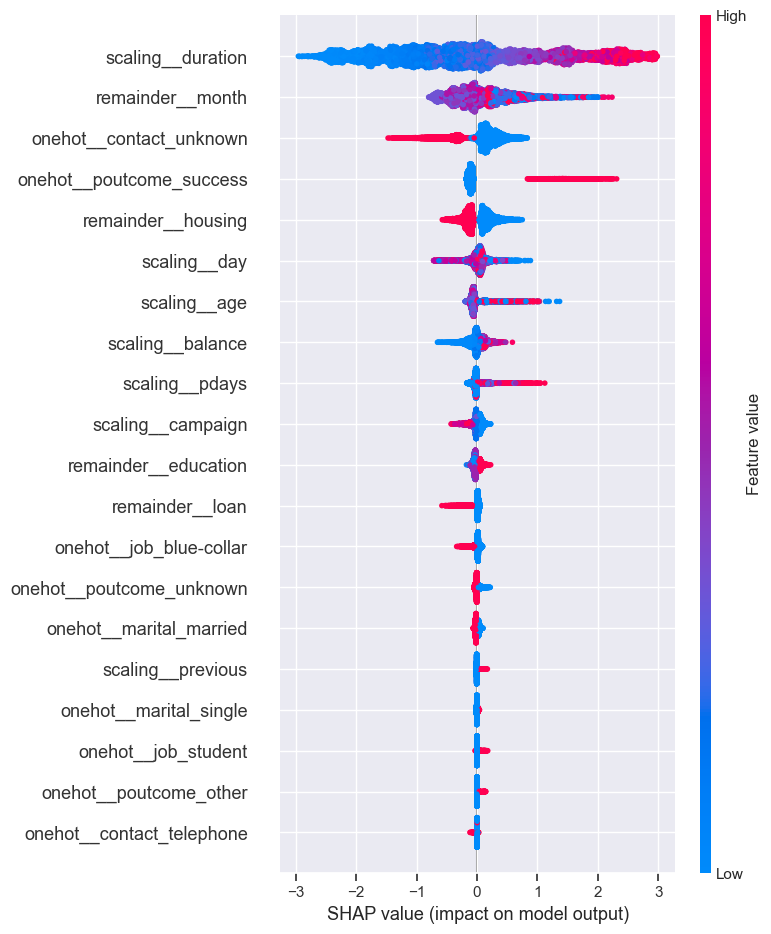

In [102]:
# Extract the correct feature names from the transformer
transformed_columns = xgbc_tuning.named_steps['transformer'].get_feature_names_out()

# Display the SHAP summary plot with the correct feature names
shap.summary_plot(shap_values, my_data, feature_names=transformed_columns);

## 📊 Interpretasi Grafik SHAP

Grafik ini adalah **SHAP Summary Plot**, yang digunakan untuk memahami kontribusi masing-masing fitur terhadap hasil prediksi model machine learning.

---

## 🔍 Penjelasan Umum

- **Sumbu X (SHAP value)**:
  - Menunjukkan seberapa besar pengaruh fitur terhadap output model.
  - Nilai positif → mendorong prediksi ke kelas positif (misalnya: "ya").
  - Nilai negatif → mendorong prediksi ke kelas negatif.

- **Warna Titik (Gradasi Biru ke Merah)**:
  - 🔵 Biru = nilai fitur rendah.
  - 🔴 Merah = nilai fitur tinggi.

- **Setiap titik** mewakili satu data/observasi dalam dataset.

---

## 💡 Fitur-fitur Penting dan Pengaruhnya

### 1. `scaling__duration` (Durasi panggilan)
- **Deskripsi:** Lama durasi panggilan telepon ke nasabah.
- **Pengaruh:** Durasi lebih panjang (🔴) secara signifikan mendorong prediksi ke arah positif.
- **Interpretasi bisnis:** Kontak yang lebih lama menunjukkan adanya minat atau engagement dari nasabah.

---

### 2. `remainder__month` (Bulan terakhir kontak)
- **Deskripsi:** Bulan saat kontak dilakukan.
- **Pengaruh:** Beberapa bulan (tergantung konteks kampanye) cenderung memiliki efek positif atau negatif.
- **Interpretasi bisnis:** Waktu dalam tahun bisa memengaruhi minat nasabah, misalnya saat ada promosi musiman atau momen penting finansial.

---

### 3. `onehot__contact_unknown` (Jenis kontak tidak diketahui)
- **Deskripsi:** Tidak ada informasi cara kontak (misalnya telepon/email).
- **Pengaruh:** Nilai ini mendorong prediksi negatif secara konsisten.
- **Interpretasi bisnis:** Kurangnya data atau informasi kontak bisa menunjukkan kualitas kampanye rendah atau pengelolaan data yang buruk.

---

### 4. `onehot__poutcome_success` (Hasil kampanye sebelumnya sukses)
- **Deskripsi:** Nasabah pernah berhasil dihubungi dalam kampanye sebelumnya.
- **Pengaruh:** Sangat positif untuk prediksi — konsisten dan kuat.
- **Interpretasi bisnis:** Riwayat keberhasilan sebelumnya adalah indikator kuat kemungkinan keberhasilan berikutnya.

---

### 5. `remainder__housing` (Memiliki pinjaman perumahan)
- **Deskripsi:** Apakah nasabah memiliki kredit rumah.
- **Pengaruh:** Kombinasi nilai tinggi dan rendah menunjukkan efek campuran.
- **Interpretasi bisnis:** Kepemilikan pinjaman rumah bisa menunjukkan kemampuan atau tanggungan finansial yang memengaruhi keputusan.

---

### 6. `scaling__day` (Hari dalam bulan saat kontak dilakukan)
- **Deskripsi:** Tanggal kontak dilakukan.
- **Pengaruh:** Tidak terlalu kuat tetapi tetap memiliki pengaruh fluktuatif.
- **Interpretasi bisnis:** Hari-hari tertentu bisa lebih optimal tergantung ritme kerja nasabah.

---

### 7. `scaling__age` (Usia nasabah)
- **Deskripsi:** Umur nasabah.
- **Pengaruh:** Usia tertentu mendorong hasil positif atau negatif tergantung kelompoknya.
- **Interpretasi bisnis:** Usia berkaitan dengan kebutuhan produk dan kemampuan keuangan.

---

### 8. `scaling__balance` (Saldo nasabah)
- **Deskripsi:** Saldo rata-rata dalam rekening nasabah.
- **Pengaruh:** Nasabah dengan saldo lebih tinggi (🔴) cenderung menghasilkan prediksi positif.
- **Interpretasi bisnis:** Daya beli dan potensi tertarik pada produk finansial baru meningkat seiring saldo.

---

### 9. `scaling__pdays` (Hari sejak kontak terakhir)
- **Deskripsi:** Jarak hari dari kontak sebelumnya.
- **Pengaruh:** Nilai -1 (tidak pernah dikontak sebelumnya) sering menghasilkan efek negatif.
- **Interpretasi bisnis:** Semakin baru kontak sebelumnya, kemungkinan berhasilnya kampanye lebih tinggi.

---

### 10. `scaling__campaign` (Jumlah kontak selama kampanye)
- **Deskripsi:** Berapa kali nasabah dikontak dalam kampanye saat ini.
- **Pengaruh:** Nilai tinggi justru cenderung negatif.
- **Interpretasi bisnis:** Kontak yang terlalu sering bisa dianggap mengganggu atau menunjukkan ketidaktertarikan nasabah.

---

## ✅ Kesimpulan

- **Fitur paling penting adalah durasi panggilan (`duration`)**, diikuti oleh waktu kontak dan riwayat interaksi sebelumnya.
- Faktor kualitas data (`contact_unknown`) dan konteks historis (`poutcome_success`) berpengaruh besar.
- Karakteristik pribadi seperti usia, saldo, dan status pinjaman tetap relevan untuk mempersonalisasi penawaran.

---
